In [1]:
# --- Step 1: Import libraries ---
import cv2
import matplotlib.pyplot as plt

In [3]:
# --- Step 2: Read a colored image ---
img = cv2.imread('1.jpg')          # Replace with your image name if needed
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for correct colors

In [4]:
# --- Step 3: Split into Red, Green, Blue components ---
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]


In [5]:
# --- Step 4: Convert to Grayscale ---
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [6]:
# --- Step 5: Convert Grayscale to Binary using Thresholding ---
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

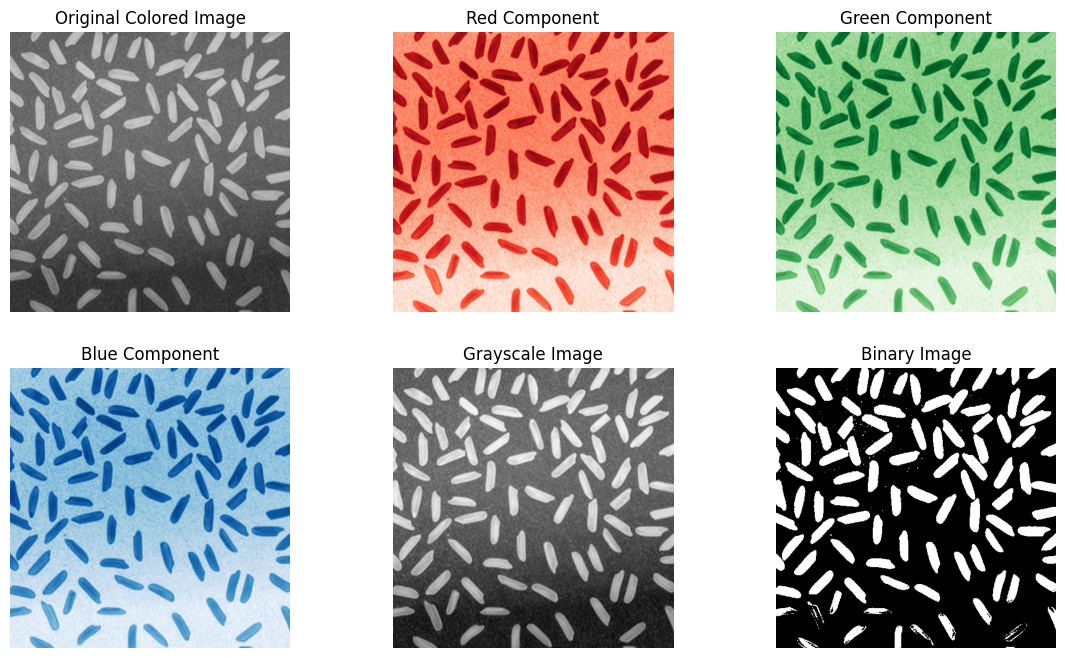

In [7]:
# --- Step 6: Display all results ---
plt.figure(figsize=(14,8))

plt.subplot(2,3,1)
plt.title("Original Colored Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(2,3,2)
plt.title("Red Component")
plt.imshow(R, cmap='Reds')
plt.axis('off')

plt.subplot(2,3,3)
plt.title("Green Component")
plt.imshow(G, cmap='Greens')
plt.axis('off')

plt.subplot(2,3,4)
plt.title("Blue Component")
plt.imshow(B, cmap='Blues')
plt.axis('off')

plt.subplot(2,3,5)
plt.title("Grayscale Image")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(2,3,6)
plt.title("Binary Image")
plt.imshow(binary, cmap='gray')
plt.axis('off')

plt.show()

# TASK 2

In [18]:
# --- Step 1: Import Libraries ---
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# --- Step 2: Read the Binary Image (2.jpg) ---
# Make sure 1.jpg is in the same folder as your notebook
img = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)

In [20]:
# --- Step 3: Convert to Binary using Thresholding ---
# You can try Otsu’s automatic threshold
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)



In [21]:
# --- Step 4: Remove small noise using Morphological Opening ---
kernel = np.ones((3,3), np.uint8)
cleaned = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)


In [22]:
# --- Step 5: Apply Connected Component Labeling ---
num_labels, labels = cv2.connectedComponents(cleaned)

In [23]:
print("✅ Total number of rice grains (main objects):", num_labels - 1)

✅ Total number of rice grains (main objects): 95


In [24]:
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2RGB)
labeled_img[label_hue == 0] = 0

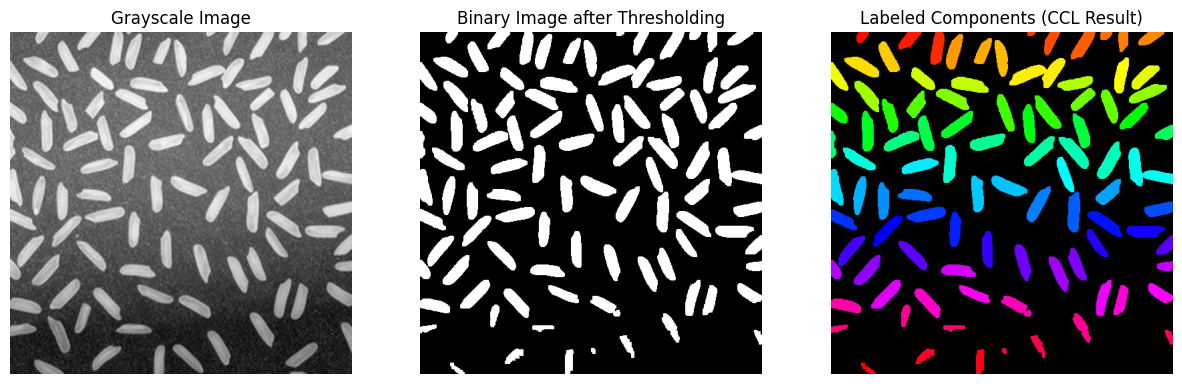

In [25]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.title("Grayscale Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Binary Image after Thresholding")
plt.imshow(cleaned, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Labeled Components (CCL Result)")
plt.imshow(labeled_img)
plt.axis('off')

plt.show()